## Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Preview the datasets
print("Customers Dataset:")
print(customers.head())

print("\nProducts Dataset:")
print(products.head())

print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [4]:
# Check for missing values
print("\nMissing Values in Datasets:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())



Missing Values in Datasets:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
# Univariate Analysis
print("\nUnique Categories in Products:")
print(products['Category'].value_counts())


Unique Categories in Products:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


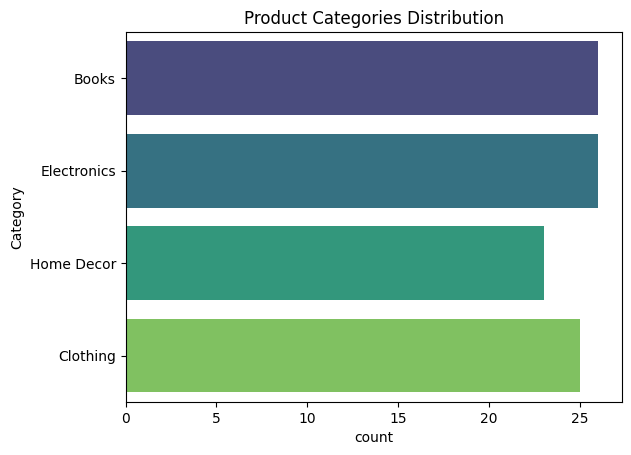

In [6]:
# Bar chart for product categories
sns.countplot(data=products, y='Category', palette="viridis")
plt.title("Product Categories Distribution")
plt.show()


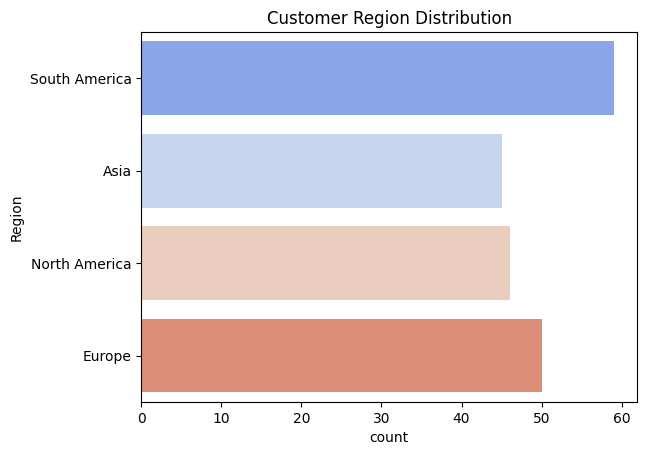

In [7]:
# Region distribution in customers
sns.countplot(data=customers, y='Region', palette="coolwarm")
plt.title("Customer Region Distribution")
plt.show()

In [8]:
# Bivariate Analysis
# Total sales per region
region_sales = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
region_sales = pd.merge(region_sales, customers[['CustomerID', 'Region']], on='CustomerID')
region_sales = region_sales.groupby('Region')['TotalValue'].sum().reset_index()

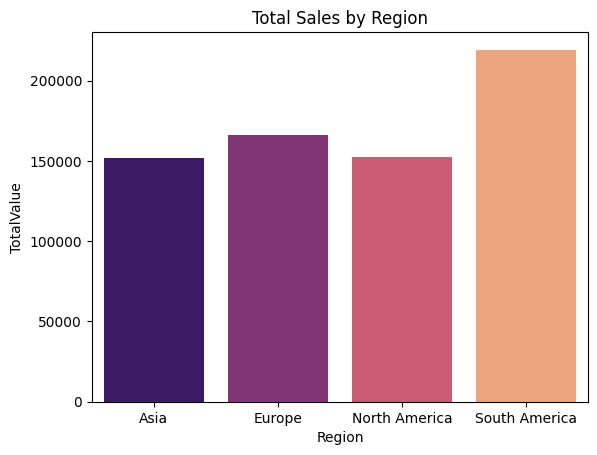

In [9]:
sns.barplot(data=region_sales, x='Region', y='TotalValue', palette="magma")
plt.title("Total Sales by Region")
plt.show()

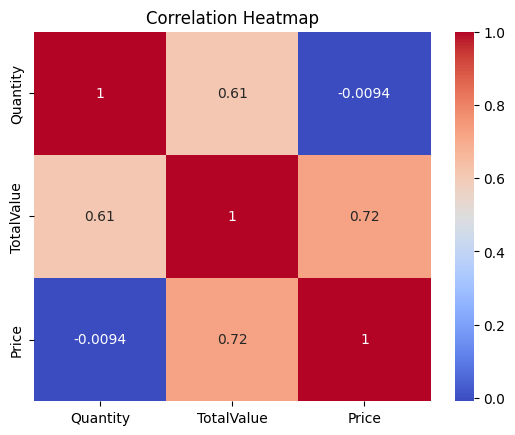

In [10]:
# Correlation heatmap
correlation_matrix = transactions[['Quantity', 'TotalValue', 'Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

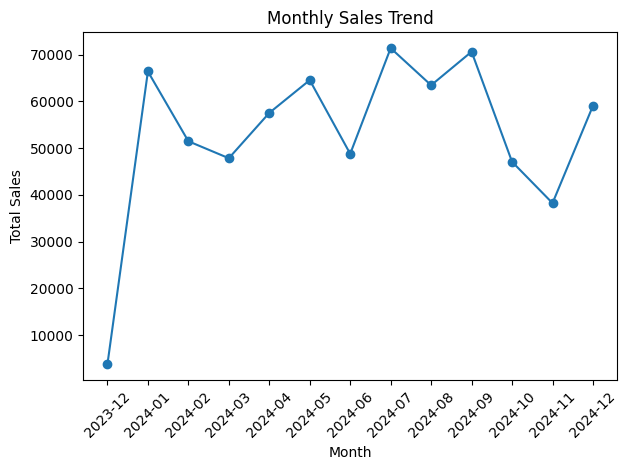

In [11]:
# Multivariate Analysis
# Monthly sales trends
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TotalValue'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()